# Airline Data Problem using K-means clustering

## Import Libraries and installing packages for .xlsx

In [32]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import os

In [4]:
pip install xlrd

     |████████████████████████████████| 96 kB 178 kB/s eta 0:00:01
You should consider upgrading via the '/home/prathikm/miniconda3/envs/ds/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install openpyxl

     |████████████████████████████████| 243 kB 480 kB/s eta 0:00:01
You should consider upgrading via the '/home/prathikm/miniconda3/envs/ds/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [34]:
os.chdir("/home/prathikm/Desktop/ds_assignments/doing/clustering")
df_n = pd.read_excel("EastWestAirlines.xlsx") #import airline dataset
df_n

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Drop the column ID - it is of no use

In [35]:
df = df_n.drop(['ID#'],axis=1)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


# Normalization function

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airline_df = scaler.fit_transform(df.iloc[:,:])

In [37]:
scaled_airline_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# Identify the best k-value using the elbow method

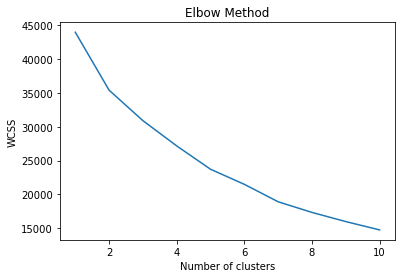

In [38]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_airline_df)
    wcss.append(kmeans.inertia_) #'within clusters sum of squares' OR intertia - this is the avg. distance of 
    # points within each cluster and store it in list wcss =[] declared above.
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# So k = 8 (or k = 10) is the best we can see

In [39]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(8, random_state=42) #randomly divide data into 4 partitions. Use any number but keep consistent
clusters_new.fit(scaled_airline_df)
clusters_new.labels_

array([2, 2, 2, ..., 7, 2, 2], dtype=int32)

In [40]:
df['clusterid_new'] = clusters_new.labels_

In [41]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,7
3995,64385,0,1,1,1,981,5,0,0,1395,1,7
3996,73597,0,3,1,1,25447,8,0,0,1402,1,7
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


# Average values of all data points within one cluster for profiling purposes.

In [42]:
#These are standardized values. #Average values of all data points within one cluster for profiling purposes.
#For example - 0 1 2 3 are clusters, so for cluster 0, there are 6 columns in each row of one record of value
#in cluster 0. So for each column, take avegrage of the rows belonging to cluster 0 then that value for that
#column is 0.80 = SAT. This SAT 0.80 is avg of all SAT scores of all rows belonging to cluster 0.
clusters_new.cluster_centers_

array([[ 2.21871113e-01, -1.46310651e-01,  6.40939380e-01,
        -9.82418871e-02, -4.82551875e-02,  2.00598959e-01,
         5.68049420e-01, -2.11985297e-01, -2.34817151e-01,
         1.83266964e-01, -7.66919299e-01],
       [ 7.60765277e-01, -7.65498314e-02,  1.65409653e+00,
        -9.82418871e-02, -5.39193925e-02,  1.63525296e+00,
         9.72947180e-01,  2.88528783e-02,  5.54148280e-02,
         5.04284523e-01,  1.03209839e+00],
       [-3.80658697e-01, -1.43939107e-01, -7.38856662e-01,
        -9.82418871e-02, -6.27665798e-02, -6.09645052e-01,
        -7.00410399e-01, -2.05744360e-01, -2.28025549e-01,
        -3.04352966e-01, -7.66919299e-01],
       [ 1.12364494e+00,  4.61979282e-01,  1.26907367e-01,
        -9.82418871e-02, -6.27665798e-02,  7.27044064e-01,
         1.87466783e+00,  4.28887761e+00,  4.49068486e+00,
         2.80822647e-01,  8.93481906e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
  

In [43]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,95957.740793,30.933428,2.941926,1.000000,1.002833,21988.899433,17.056657,163.269122,0.483003,4496.983003,0.000000
1,1,150258.367876,84.898100,4.336788,1.000000,1.001727,56632.849741,20.944732,500.450777,1.583765,5159.844560,0.868739
2,2,35244.990937,32.767976,1.042296,1.000000,1.000000,2423.169184,4.876133,172.006647,0.508761,3490.108157,0.000000
3,3,186823.234234,501.486486,2.234234,1.000000,1.000000,34701.468468,29.603604,6464.630631,18.405405,4698.423423,0.801802
4,4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
5,5,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
6,6,116472.400000,5636.345455,2.072727,1.000000,1.000000,19804.290909,12.545455,963.036364,2.890909,3950.636364,0.527273
7,7,58777.861078,99.691018,1.748503,1.000000,1.000000,11084.589222,10.785629,415.411976,1.283832,4254.955689,1.000000


In [ ]:
#Now we can comment that cluster 3 is the most important group of people for sales.